# Logisti Regression In Medical Industry - Study Case Heart Diabetes


Pada suatu sore, saya dan Fadli meminum kopi di suatu coffe shop . Fadil adalah teman saya. Dia adalah seorang dokter. 
Fadil bercerita bahwa mempunyai data tentang studi kasus diabetes jantung. Data tersebut bercerita tentang variabel yang mempengaruhi penyakit diabets. Fadil meminta bantuan saya untuk menganalisa data tersebut, dan dibuatkan suatu marchine leaning agar nantinya Fadil bisa memprediksi keadaan pasien tersebut apakah pasien tersebut terkena penyakit diabets atau tidak   .Setelah saya lihat datanya , saya teringat tentang metode logistic Regression. 

### Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

### Load Data

In [4]:
DataDiabets = pd.read_csv(r'D:\data scientist\data sheet\diabetes2.csv')

### Sneak Peak Data

In [3]:
#melihat 5 data teratas
DataDiabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#melihat 5 data terbawah
DataDiabets.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


  Saya tampilakan keterangan setiap vaiabel:
- Pregnancies                : bulan kehamilan
- Glukosa                    : Kadar glukosa dalam tubuh
- Blood Pressure             : Tekanan Darah
- Skin Thickness             : Ketebalan kulit
- Insulin                    : Kadar insulin dalam darah
- BMI                        : Angka yang menentukan apakah berat badan ideal , kurang atau berlebih
- DiabetesPedigreeFunction   : Nilai peluang terkena diabets karena keturunan
- Outcome                    : Hasil dari analisis apakah pasien tersebut terkena penyakit diabetes atau tidak. 0 = tidak terkena diabetes, 1 = terkena diabetes

In [6]:
#melihat jumlah baris dan kolom
DataDiabets.shape

(768, 9)

In [7]:
#informasi umum dari data
DataDiabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Handling Missing Values

In [8]:
#melihat data yang kosong
DataDiabets.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis

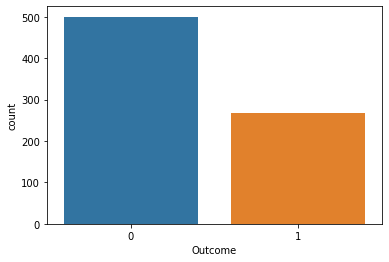

In [10]:
#univariate analysis target
sns.countplot(DataDiabets['Outcome'])

- Jumlah nilai 0 dan 1 berbeda jauh.
- Nilai 0 untuk Heart Disease.
- Nilai 1 untuk No Heart Disease.

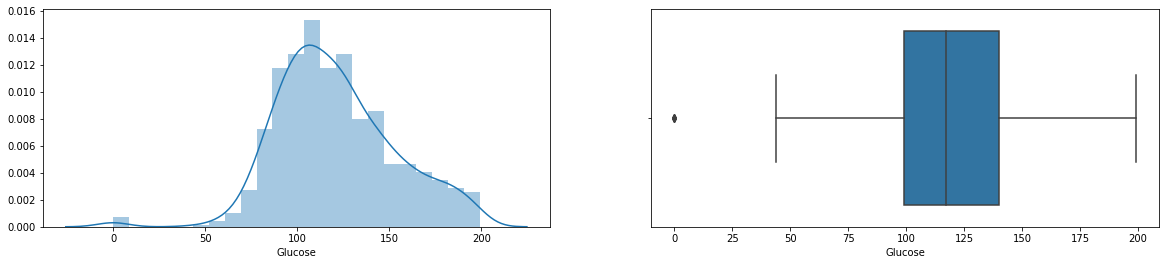

In [17]:
#univariate analysis Glucose

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['Glucose'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['Glucose'])



- Glukosa paling banyak orang pada 110 .Glukosa pada takaran 50 , tidak ada
- Pada data Glukosa terdapat outline yaitu satu data


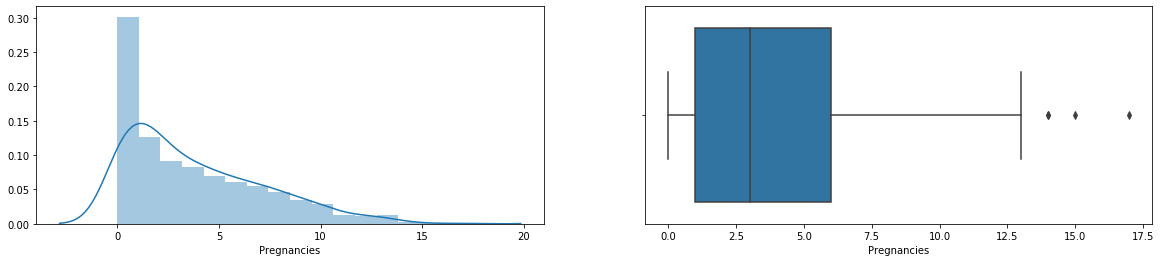

In [9]:
#univariate analysis Pregnancies

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['Pregnancies'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['Pregnancies'])



- Pregnancies atau kehamilan paling banyak pada angka ke 0 atau awal bulan kelahiran
- boxplot pada data kehamilan atau pregnancies

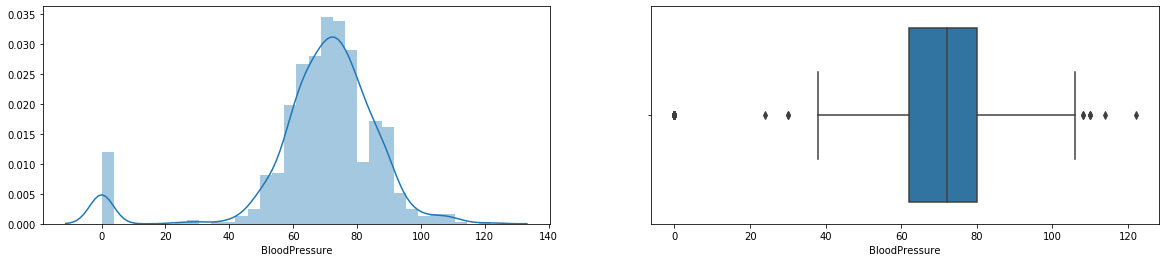

In [10]:
#univariate analysis BloodPressure

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['BloodPressure'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['BloodPressure'])



- Pada blood pressure pada data paling banyak pada 70
- terdapat 6 outline

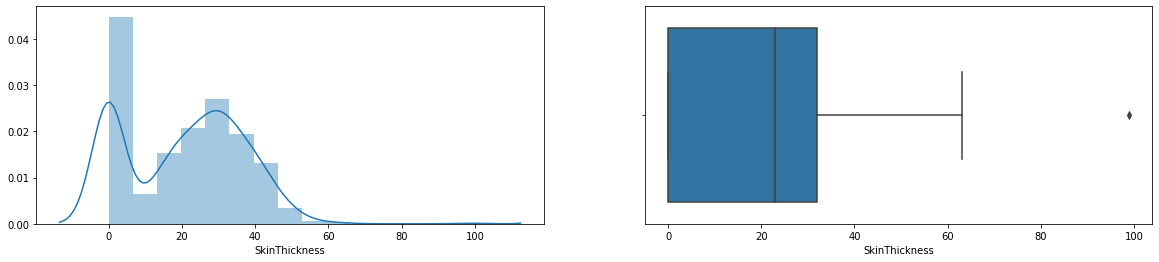

In [11]:
#univariate analysis SkinThickness

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['SkinThickness'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['SkinThickness'])



- Skin Thkickness kebanyakan angka 0
- Hanya ada 1 outline

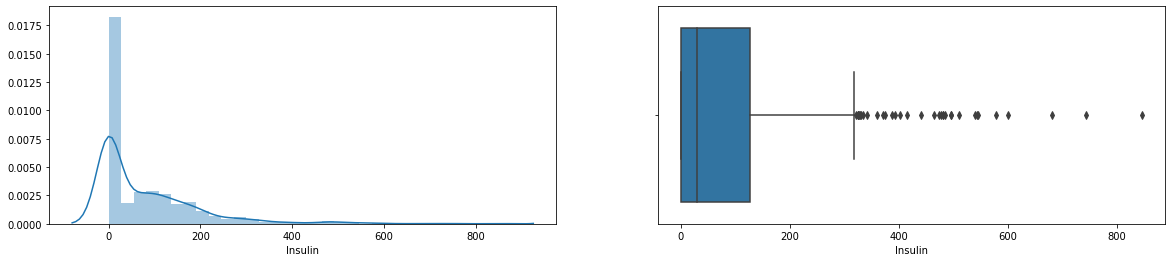

In [12]:
#univariate analysis Insulin

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['Insulin'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['Insulin'])



- Insulin paling banyak terdapat pada 30 dan 40
- Banyak terdapat banyak outline

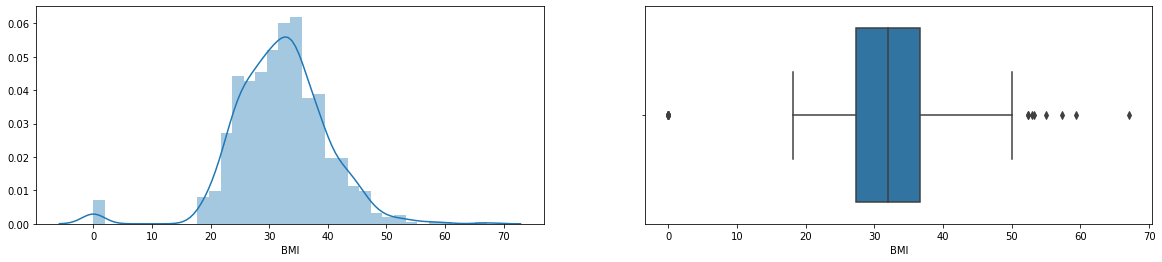

In [13]:
#univariate analysis BMI

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['BMI'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['BMI'])



- Puncak BMI pada 30
- Terdapat banyak outline pada data BMI

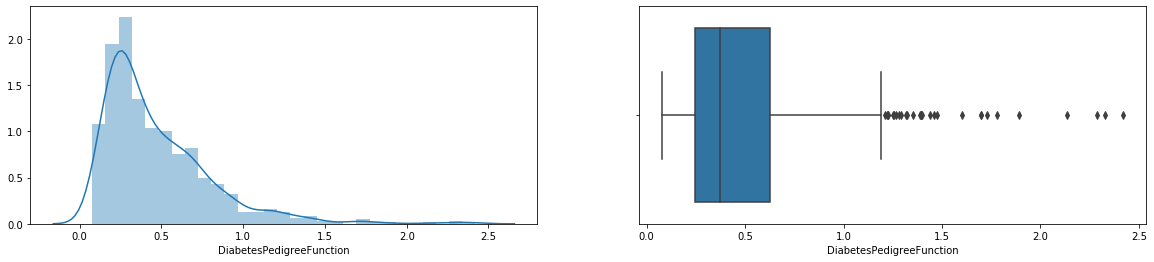

In [14]:
#univariate analysis DiabetesPedigreeFunction

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['DiabetesPedigreeFunction'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['DiabetesPedigreeFunction'])



- Data DiabetesPedigreeFunction pada puncak 0.4
- Terdapat banyak outline 

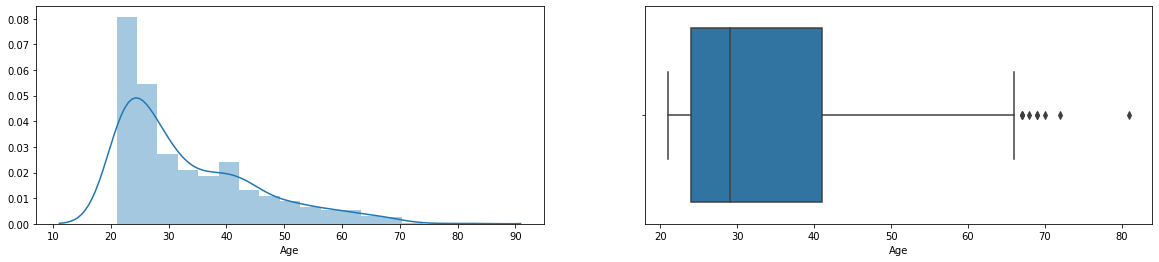

In [15]:
#univariate analysis Age

f= plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(DataDiabets['Age'])

f.add_subplot(1,2,2)
sns.boxplot(DataDiabets['Age'])



- Data pada Age paling banyak terdapat pada 25 tahun
- Data Age terdapat 6 outline

In [7]:
DataDiabets.corr().style.background_gradient().set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.13,0.14,-0.082,-0.074,0.018,-0.034,0.54,0.22
Glucose,0.13,1,0.15,0.057,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1,0.21,0.089,0.28,0.041,0.24,0.065
SkinThickness,-0.082,0.057,0.21,1,0.44,0.39,0.18,-0.11,0.075
Insulin,-0.074,0.33,0.089,0.44,1,0.2,0.19,-0.042,0.13
BMI,0.018,0.22,0.28,0.39,0.2,1,0.14,0.036,0.29
DiabetesPedigreeFunction,-0.034,0.14,0.041,0.18,0.19,0.14,1,0.034,0.17
Age,0.54,0.26,0.24,-0.11,-0.042,0.036,0.034,1,0.24
Outcome,0.22,0.47,0.065,0.075,0.13,0.29,0.17,0.24,1


- Outcome mempunyai hubungan yang yang paling kuat dengan Glukosa dan BMI
- Outcome mempunyai hubungan yang lemah dengan Blood Pressure and Skin Thickness

In [10]:
    #membuat object Logistic Regression
    log_reg = LogisticRegression()

In [11]:
# membuat variable x dan y
x = DataDiabets.drop(columns=['Outcome'])
y = DataDiabets['Outcome']

In [12]:
#membagi data menjadi menjadi data training dan data test

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [13]:
#training model
log_reg.fit(x_train, y_train)

C:\Users\ecos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# tes set prediksi
y_pred = log_reg.predict(x_test)

In [15]:
#periksa akurasi laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       102
           1       0.75      0.63      0.69        52

    accuracy                           0.81       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



- rata-rata akurasi lumayan bagus. Pada precison rata ratanya 0.79 , recall sama dengan 0.76, accuracy f1 score sama dengan 0.81
- Model yang dengan logistic Regression baik di gunakan untuk melakukan prediksi 

### Prediksi

In [15]:
DataDiabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ada seorang yang ingin memeriksa dengan kriteria sebagai berikut
- Pregnancies = 5
- Glucose = 110
- Blood Pressure = 90
- Skin Thickness = 40
- Insulin = 90
- BMI = 30
- Dibetes PedigreeFunction = 1.00
- Age = 22

In [17]:
#ubah data yang di cek dalam bntuk list
Data = [[5,110,90,40,90,30,1,22]]

In [19]:
#prediksi
log_reg.predict(Data)

array([0], dtype=int64)

Hasil prediksi adalah "0" atau tidak terkena diabets